In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mikoajfish99/lions-or-cheetahs-image-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'lions-or-cheetahs-image-classification' dataset.
Path to dataset files: /kaggle/input/lions-or-cheetahs-image-classification


In [3]:
ls /kaggle/input/lions-or-cheetahs-image-classification

images/


In [5]:
mv "/kaggle/input/lions-or-cheetahs-image-classification/images" /content

mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/e830bd6011902b40.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/4352b19e155bd4ed.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/10737ee53398f08a.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/eab5a653e7bc2c95.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/adfdaaeb0e86ac94.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/84fea0403c89c288.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/0054521c7ff56e05.jpg': Read-only file system
mv: cannot remove '/kaggle/input/lions-or-cheetahs-image-classification/images/Lions/f7bef

In [6]:
cd /content/images

/content/images


In [7]:
pwd

'/content/images'

In [8]:
import tensorflow as tf
import os

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
cd ..

/content


In [12]:
data_dir = "images"

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [17]:
data = tf.keras.utils.image_dataset_from_directory('images')

Found 200 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [20]:
len(batch)

2

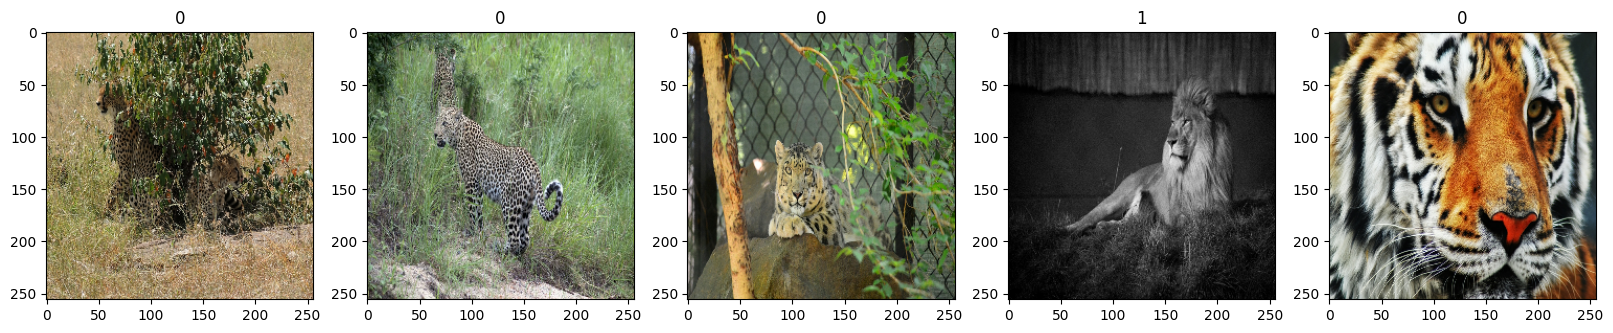

In [22]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
print(data.class_names)

['Cheetahs', 'Lions']


In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
data.as_numpy_iterator().next()

(array([[[[0.17258732, 0.19546568, 0.17289752],
          [0.10717677, 0.11632966, 0.12938878],
          [0.29124925, 0.2834061 , 0.2997434 ],
          ...,
          [0.280733  , 0.2787722 , 0.19053692],
          [0.474843  , 0.48464692, 0.31798023],
          [0.58757657, 0.611106  , 0.36404717]],
 
         [[0.40106848, 0.44518995, 0.2872664 ],
          [0.21197917, 0.23650046, 0.15505515],
          [0.15997626, 0.15900736, 0.15506281],
          ...,
          [0.35298714, 0.35298714, 0.2490579 ],
          [0.4990311 , 0.508835  , 0.34216836],
          [0.57942325, 0.60295266, 0.36178386]],
 
         [[0.4438419 , 0.48990119, 0.31125152],
          [0.3642961 , 0.3950023 , 0.28002068],
          [0.20292203, 0.21305913, 0.18427543],
          ...,
          [0.4301547 , 0.44584098, 0.3150965 ],
          [0.5261949 , 0.54776347, 0.37717524],
          [0.577765  , 0.6088044 , 0.3830193 ]],
 
         ...,
 
         [[0.21522288, 0.23386948, 0.26827896],
          [0.22017

In [26]:
train_size = int(len(data)*.7) #70% train
val_size = int(len(data)*.2) #20% validation
test_size = int(len(data)*.1)#10% test

In [27]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [28]:
from tensorflow.keras.models import Sequential #singl input and singl output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers


In [29]:
model = Sequential()


In [30]:
model.add(Conv2D(16,(3,3), strides=1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),strides=1,activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
logdir = 'logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [35]:
hist = model.fit(train,epochs=17,validation_data=val,callbacks=tensorboard_callback)

Epoch 1/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4917 - loss: 1.1809 - val_accuracy: 0.5938 - val_loss: 1.0397
Epoch 2/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5396 - loss: 1.0596 - val_accuracy: 0.7188 - val_loss: 0.9724
Epoch 3/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7479 - loss: 0.9469 - val_accuracy: 0.5625 - val_loss: 0.8849
Epoch 4/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5719 - loss: 0.8861 - val_accuracy: 0.8125 - val_loss: 0.8086
Epoch 5/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8010 - loss: 0.7889 - val_accuracy: 0.8438 - val_loss: 0.7340
Epoch 6/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.7760 - loss: 0.7182 - val_accuracy: 0.9688 - val_loss: 0.5979
Epoch 7/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.6729 - loss: 0.7535 - val_accuracy: 0.8438 - val_loss: 0.6125
Epoch 8/17
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8583 - loss: 0.6431 - val_accuracy: 0.8750 - val_loss: 0.6075
Epoch 9/

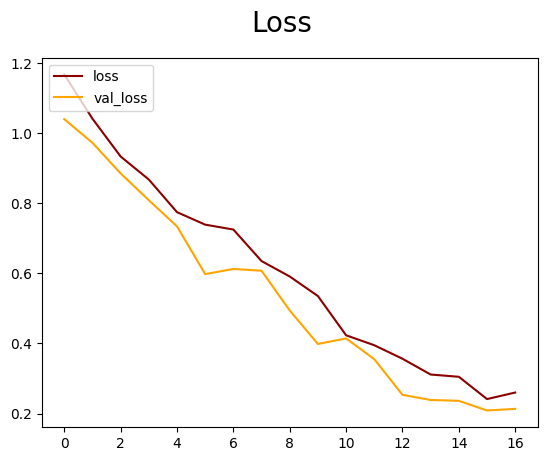

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='darkred', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

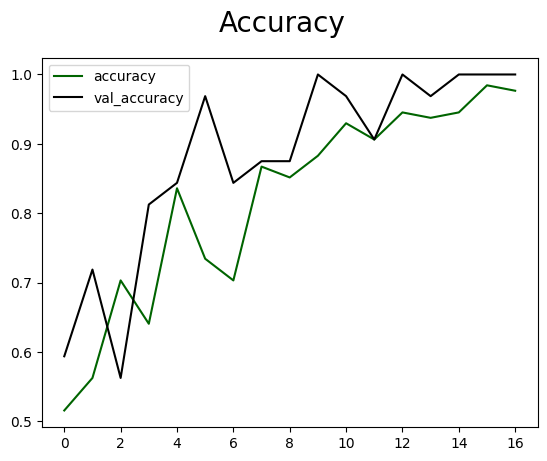

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='darkgreen', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='k', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
import cv2

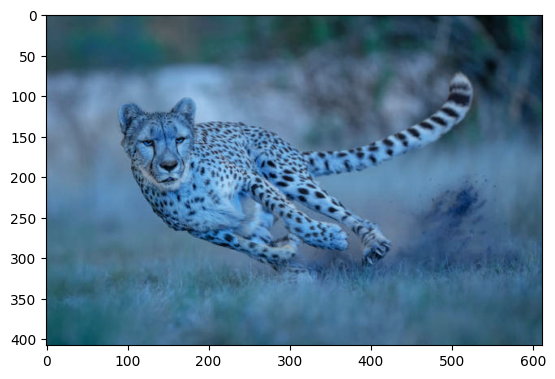

In [40]:
img = cv2.imread('/content/istockphoto-1758173843-612x612.jpg')
plt.imshow(img)
plt.show()

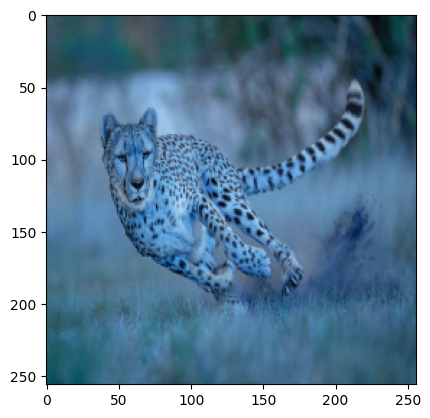

In [41]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

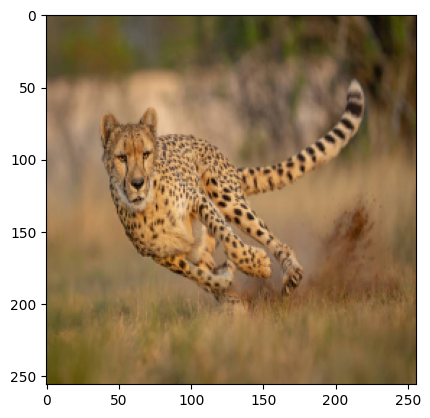

In [42]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [43]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [44]:
yhat

array([[0.27914214]], dtype=float32)

In [45]:
if yhat > 0.5:
    print(f'Predicted class is Lion')
else:
    print(f'Predicted class is Cheetah')

Predicted class is Cheetah


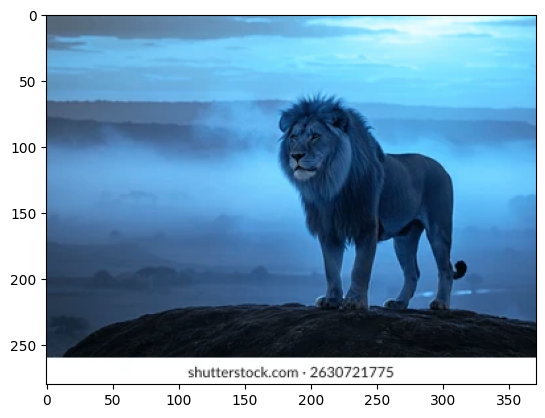

In [46]:
img = cv2.imread('/content/powerful-male-lion-stands-proudly-260nw-2630721775.webp')
plt.imshow(img)
plt.show()

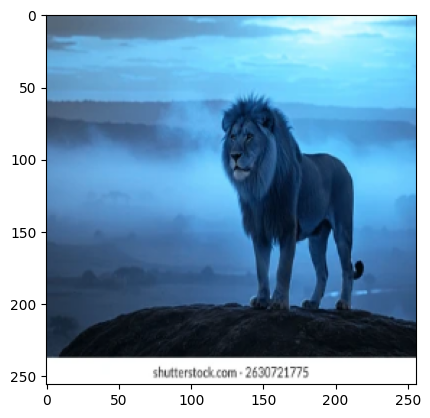

In [47]:
img = cv2.resize(img,(256,256))
plt.imshow(img)
plt.show()

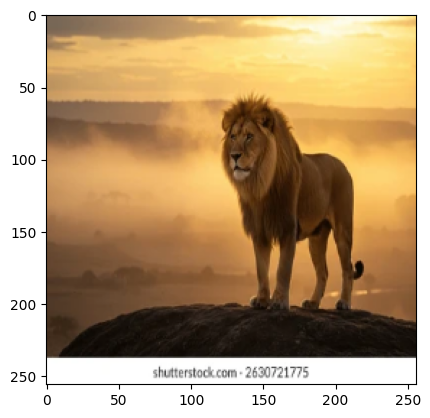

In [48]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [49]:
yhat = model.predict(np.expand_dims(img/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [50]:
yhat

array([[0.7217256]], dtype=float32)

In [51]:
if yhat > 0.5:
    print(f'Predicted class is Lion')
else:
    print(f'Predicted class is Cheetah')

Predicted class is Lion


In [52]:
model.save(os.path.join('models_2','image_classifier_models.h5'))